In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

from sklearn_pandas import DataFrameMapper, cross_val_score
from pandas import DataFrame, read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline

import sklearn.preprocessing, sklearn.decomposition,sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
#save the ID column
train_ID = train['Id']
test_ID = test['Id']

#Drop the ID column since it is unnecessary for the prediction process
train.drop("Id",axis =1,inplace = True)
test.drop("Id",axis =1,inplace= True)


In [7]:
print ("Train data: \n")
print ("Number of columns: " + str (train.shape[1]))
print ("number of rows: " + str (train.shape[0]))

print('\nTest data: \n')
print ("number of columns:" + str (test.shape[1]))
print ("Number of columns:" +  str (test.shape[0]))

Train data: 

Number of columns: 80
number of rows: 1460

Test data: 

number of columns:79
Number of columns:1459


In [8]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
LotFrontage_filter_OL = train.LotFrontage > 312
LotArea_filter_OL = train.LotArea > 100000
YearBuilt_filter_OL = train.YearBuilt < 1900

train_copy = train[~LotFrontage_filter_OL]
train_copy = train[~LotArea_filter_OL]
train_copy = train[~YearBuilt_filter_OL]

X_train = train_copy[['LotFrontage','LotArea','YearBuilt','GarageCars','GarageArea','YearRemodAdd','GrLivArea','Fireplaces','PoolArea','FullBath','MiscVal']]
X_train['LotFrontage'].fillna(70,inplace=True)
X_train['YearBuilt'] = X_train['YearBuilt'].apply(lambda x: (2019-x))
X_train['YearRemodAdd'] = X_train['YearRemodAdd'].apply(lambda x: (2019-x))
#X_train['GarageYrBlt'] = X_train['GarageYrBlt'].apply(lambda x: (2019-x))
X_train['TotalSF']= train_copy['TotalBsmtSF'] + train_copy['1stFlrSF'] + train_copy['2ndFlrSF']
#TotRmsAbvGrd
#YrSold

X_train.info()

Y_train = train_copy['SalePrice']


#LotFrontage
#LotArea
#YearBuilt
#YearRemodAdd
#MasVnrArea
#BsmtFinSF1
#BsmtFinSF2
#BsmtUnfSF
#TotalBsmtSF
#1stFlrSF: First Floor square feet
#2ndFlrSF: Second floor square feet
#LowQualFinSF: Low quality finished square feet (all floors)
#GrLivArea: Above grade (ground) living area square feet
#BsmtFullBath: Basement full bathrooms
#BsmtHalfBath: Basement half bathrooms
#FullBath: Full bathrooms above grade
#HalfBath: Half baths above grade
#Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
#Kitchen: Kitchens above grade
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#Fireplaces: Number of fireplaces
#GarageYrBlt: Year garage was built
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#WoodDeckSF: Wood deck area in square feet
#OpenPorchSF: Open porch area in square feet
#EnclosedPorch: Enclosed porch area in square feet
#3SsnPorch: Three season porch area in square feet
#ScreenPorch: Screen porch area in square feet
#PoolArea: Pool area in square feet
#MiscVal: $Value of miscellaneous feature
#MoSold: Month Sold (MM)
#YrSold: Year Sold (YYYY)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 12 columns):
LotFrontage     1445 non-null float64
LotArea         1445 non-null int64
YearBuilt       1445 non-null int64
GarageCars      1445 non-null int64
GarageArea      1445 non-null int64
YearRemodAdd    1445 non-null int64
GrLivArea       1445 non-null int64
Fireplaces      1445 non-null int64
PoolArea        1445 non-null int64
FullBath        1445 non-null int64
MiscVal         1445 non-null int64
TotalSF         1445 non-null int64
dtypes: float64(1), int64(11)
memory usage: 146.8 KB


/Users/Rishu/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/Rishu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/Rishu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [38]:
mapper = DataFrameMapper([
...     (['LotFrontage'], sklearn.preprocessing.MinMaxScaler()),
...     (['LotArea'], sklearn.preprocessing.MinMaxScaler()),
...     (['YearBuilt'], sklearn.preprocessing.StandardScaler()),
    (['GarageCars'], sklearn.preprocessing.StandardScaler()),
    (['GarageArea'], sklearn.preprocessing.StandardScaler()),
    (['YearRemodAdd'], sklearn.preprocessing.StandardScaler()),
    (['Fireplaces'], sklearn.preprocessing.StandardScaler()),
    (['PoolArea'], sklearn.preprocessing.StandardScaler()),
    (['FullBath'], sklearn.preprocessing.StandardScaler()),
    (['MiscVal'], sklearn.preprocessing.StandardScaler()),
    (['TotalSF'], sklearn.preprocessing.StandardScaler()),    
... ], df_out=True)

In [27]:
new_X_train = mapper.fit_transform(X_train.copy())

In [28]:
new_X_train

,LotFrontage,LotArea,YearBuilt,GarageCars,GarageArea,YearRemodAdd,Fireplaces,PoolArea,FullBath,MiscVal,TotalSF
0,0.150685,0.033420,-1.062456,0.312924,0.352696,-0.877603,-0.954704,-0.069049,0.794325,-0.087540,0.005993
1,0.202055,0.038795,-0.132169,0.312924,-0.060974,0.428856,0.597093,-0.069049,0.794325,-0.087540,-0.045282
2,0.160959,0.046507,-0.993546,0.312924,0.634744,-0.829215,0.597093,-0.069049,0.794325,-0.087540,0.176909
3,0.133562,0.038561,1.969591,1.658684,0.794571,0.719180,0.597093,-0.069049,-1.027579,-0.087540,-0.107545
4,0.215753,0.060576,-0.959091,1.658684,1.706525,-0.732441,0.597093,-0.069049,0.794325,-0.087540,0.954579
5,0.219178,0.059899,-0.717906,0.312924,0.033042,-0.490504,-0.954704,-0.069049,-1.027579,1.316989,-0.492107
6,0.184932,0.041057,-1.096912,0.312924,0.766366,-0.974377,0.597093,-0.069049,0.794325,-0.087540,0.999750
7,0.167808,0.042450,-0.028804,0.312924,0.051845,0.574018,2.148889,-0.069049,0.794325,0.614724,0.776338
8,0.102740,0.022529,1.418309,0.312924,-0.023367,1.686927,2.148889,-0.069049,0.794325,-0.087540,0.201326
9,0.099315,0.028605,1.142669,-1.032836,-1.259677,1.686927,2.148889,-0.069049,-1.027579,-0.087540,-0.601982


In [29]:
from sklearn import linear_model
# Initialize model

regression_model = linear_model.LinearRegression()

regression_model.fit(new_X_train, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

178445.6025252314
[ -3127.23671549  69827.62927967 -10134.35454897  11240.10597797
   3526.46560307 -12241.79367093   9139.72489557  -1294.71220776
   1792.90009404   -240.49542136  39847.47985488]


In [30]:
regression_model.score(new_X_train, Y_train)

0.7380311459373191

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(regression_model
                                                        ,X = new_X_train
                                                        ,y = Y_train
                                                        ,cv =5
                                                        ,scoring = 'r2'
                                                        ,train_sizes = np.linspace(0.2, 1.0, num=5)
                                                        #,train_sizes =[200,400,600,800,1000]
                                                       )
#neg_mean_squared_error

In [33]:
print(train_sizes)
print(train_scores)
print(test_scores)

[ 231  462  693  924 1156]
[[0.85249878 0.80781476 0.80781476 0.80781476 0.80781476]
 [0.78094206 0.79700737 0.8194349  0.8194349  0.8194349 ]
 [0.78022884 0.79253991 0.78573888 0.78106505 0.78106505]
 [0.77701391 0.78489117 0.77734378 0.78062087 0.78297332]
 [0.72752833 0.72997657 0.7273181  0.73314699 0.78299908]]
[[0.78899547 0.6962415  0.76032537 0.7476438  0.4914402 ]
 [0.72832123 0.75955207 0.77647722 0.76397519 0.52472439]
 [0.79145762 0.7556794  0.7684832  0.76537674 0.54884821]
 [0.78198036 0.75110841 0.77230303 0.76780145 0.5417342 ]
 [0.7855049  0.76165389 0.76096495 0.75579594 0.54285768]]


[0.81675156 0.80725082 0.78412755 0.78056861 0.74019381]
[0.69692927 0.71061002 0.72596903 0.72298549 0.72135547]


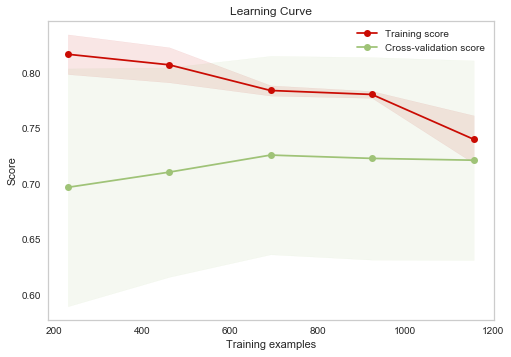

In [34]:
    plt.figure()
    ylim=None
    plt.title('Learning Curve')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    print(train_scores_mean)
    print(test_scores_mean)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",  label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

In [35]:
from sklearn.model_selection import KFold

cv = KFold(5)

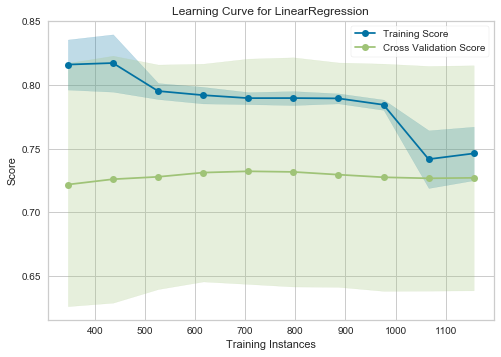

In [36]:
from yellowbrick.model_selection import LearningCurve
#poly_regression_model_out.score(X = X_train_poly_out, y = Y_train_Out)
viz = LearningCurve(
    regression_model, cv = cv, train_sizes=np.linspace(0.3, 1.0, num=10),
    scoring='r2', n_jobs=4
)

# Fit and poof the visualizer
viz.fit(X = X_train, y = Y_train)
viz.poof()

In [40]:
#!pip install yellowbrick
#!pip install category_encoders
#!pip install sklearn_pandas

In [81]:
#train['MasVnrArea'].describe()
#train['MasVnrArea'].value_counts()

#train['YearBuilt'].describe()
train['YearBuilt'].value_counts()

#train['GarageCars'].describe()
#train['GarageCars'].value_counts()

#train['GarageArea'].describe()
#train['GarageArea'].value_counts()

#train['PoolArea'].describe()
#train['PoolArea'].value_counts()

#train['Fireplaces'].describe()
#train['Fireplaces'].value_counts()

#train['TotRmsAbvGrd'].describe()
#train['TotRmsAbvGrd'].value_counts()




#train['EnclosedPorch'].describe()
#train['EnclosedPorch'].value_counts()

#train['3SsnPorch'].describe()
#train['3SsnPorch'].value_counts()

#train['ScreenPorch'].describe()
#train['ScreenPorch'].value_counts()


2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
1910    17
1960    17
1993    17
1978    16
1955    16
1925    16
1963    16
1967    16
1996    15
1941    15
1964    15
1969    14
1956    14
1961    14
1997    14
1948    14
1992    13
1990    12
1953    12
1949    12
1988    11
1973    11
1915    10
1900    10
1980    10
1974    10
1979     9
1926     9
1930     9
1936     9
1984     9
1939     8
1922     8
1975     8
1916     8
1924     7
1928     7
1918     7
1914     7
1923     7
1946     7
1935     6
1945     6
1931     6
1982     6
1921     6
1951     6
1985     5
1937     5
1947     5
1991     5
1981     5
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3

In [79]:
train['GarageYrBlt'].describe()
#train['MasVnrType'].value_counts()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [80]:
#train['LotFrontage'].describe()
train['GarageYrBlt'].value_counts()
#train['LotArea'].describe()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [71]:
train['MiscVal'].describe()



count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

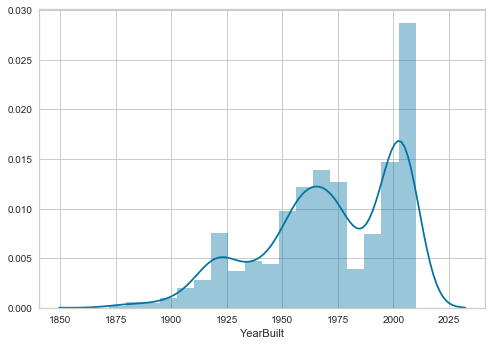

In [37]:
#sns.distplot(train['LotFrontage'].fillna(70))

#sns.distplot(train['MasVnrArea'].fillna(103))
#sns.boxplot(train['MasVnrArea'])

#sns.distplot(train['YearBuilt'])





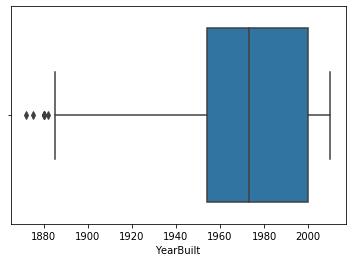

In [83]:
#sns.boxplot(train['LotFrontage'])
sns.boxplot(train['YearBuilt'])





In [43]:
#LotFrontage = [1952,2007]
#gd_year = gapm[gapm.year.isin(years)]
#gd_year.info()
#gapm.year.isin(years)
#gd_year

#Street: Type of road access to property

 #      Grvl	Gravel	
  #     Pave	Paved
   #    	
#Alley: Type of alley access to property

 #      Grvl	Gravel
  #     Pave	Paved
   #    NA 	No alley access
        
LotFrontage_filter_null = train.LotFrontage.isnull()
train_LotFrontage_filter_null_data = train[LotFrontage_filter_null]
#years_filter = gapm.year.isin(years)
#print(gapm[~country_filter & years_filter])
train_LotFrontage_filter_null_data.Alley.value_counts()
#train_LotFrontage_filter_null_data.Street.value_counts()




Grvl    3
Pave    2
Name: Alley, dtype: int64

In [56]:
LotArea_Filtr_data = train[train.LotArea > 100000]
LotArea_Filtr_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [51]:
#LotFrontage = [1952,2007]
#gd_year = gapm[gapm.year.isin(years)]
#gd_year.info()
#gapm.year.isin(years)
#gd_year

#Street: Type of road access to property

 #      Grvl	Gravel	
  #     Pave	Paved
   #    	
#Alley: Type of alley access to property

 #      Grvl	Gravel
  #     Pave	Paved
   #    NA 	No alley access
        
Street_filter_Grvl = ['Grvl']
train_Street_filter_Grvl_data = train[train.Street.isin(Street_filter_Grvl)]
#years_filter = gapm.year.isin(years)
#print(gapm[~country_filter & years_filter])
train_Street_filter_Grvl_data
#train_LotFrontage_filter_null_data.Street.value_counts()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
52,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,Corner,Mod,IDOTRR,RRNn,Norm,Duplex,1Story,5,5,1963,1963,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,Gd,TA,Gd,LwQ,104,GLQ,712,0,816,GasA,TA,N,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,5,Typ,0,NaN,CarPort,1963.0,Unf,2,516,TA,TA,Y,106,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
335,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
582,90,RL,81.0,11841,Grvl,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,816,Unf,0,0,816,GasA,TA,Y,SBrkr,816,0,0,816,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,118500
812,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,540,540,GasA,TA,N,FuseA,1044,0,0,1044,0,0,1,0,2,1,Fa,4,Typ,0,NaN,Basment,1952.0,Unf,2,504,TA,TA,N,0,0,0,0,0,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
1061,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1184,20,RL,50.0,35133,Grvl,NaN,Reg,Lvl,AllPub,Inside,Mod,Timber,Norm,Norm,1Fam,1Story,5,4,1963,1963,Hip,CompShg,MetalSd,MetalSd,BrkFace,226.0,TA,TA,CBlock,TA,TA,Gd,Rec,1159,Unf,0,413,1572,GasA,Gd,Y,SBrkr,1572,0,0,1572,1,0,1,1,3,1,TA,5,Typ,2,TA,2Types,1963.0,RFn,3,995,TA,TA,Y,0,263,0,0,263,0,NaN,NaN,NaN,0,5,2007,WD,Normal,186700


In [103]:
Y_train.info()

AttributeError: 'Series' object has no attribute 'info'

In [95]:
Y_train.head()


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [102]:
print(Y_train)

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [108]:
#descriptive statistics summary
Y_train.describe()


count      1456.000000
mean     180605.766484
std       79274.640742
min       34900.000000
25%      129900.000000
50%      162950.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


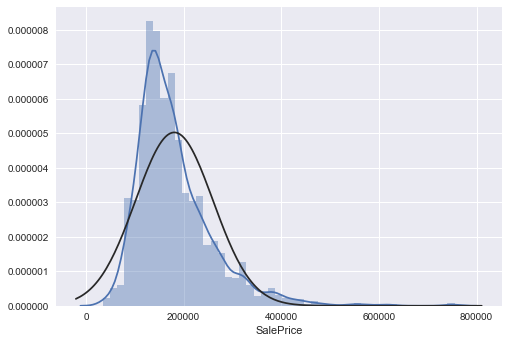

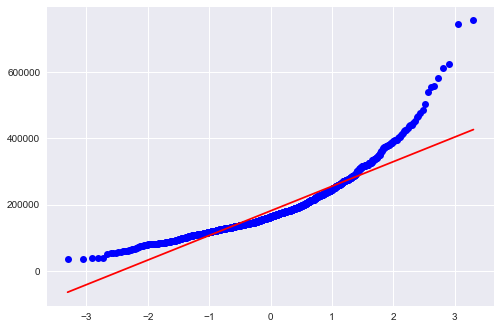

skewness: 1.882876
kurtosis: 6.536282


In [7]:
# kernel density plot
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('SalePrice Distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice']);
#QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
print("skewness: %f" % train['SalePrice'].skew())
print("kurtosis: %f" % train ['SalePrice'].kurt())

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


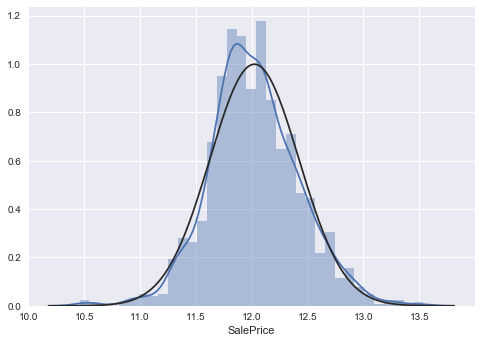

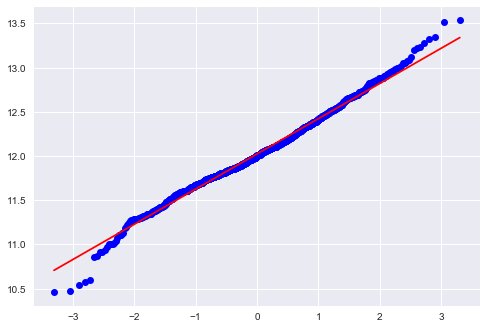

In [8]:
#log transform the target 
train["SalePrice"] = np.log1p(train["SalePrice"])

#Kernel Density plot
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');
#Get the fitted parameters used by the function
(mu,sigma)= norm.fit(train['SalePrice']);
#QQ plot
fig =plt.figure()
res =stats. probplot(train['SalePrice'], plot=plt)
plt.show()


In [9]:
print("skewness: %f" % train['SalePrice'].skew())
print("kurtosis: %f" % train ['SalePrice'].kurt())

skewness: 0.121347
kurtosis: 0.809519


#### Exploring the variables

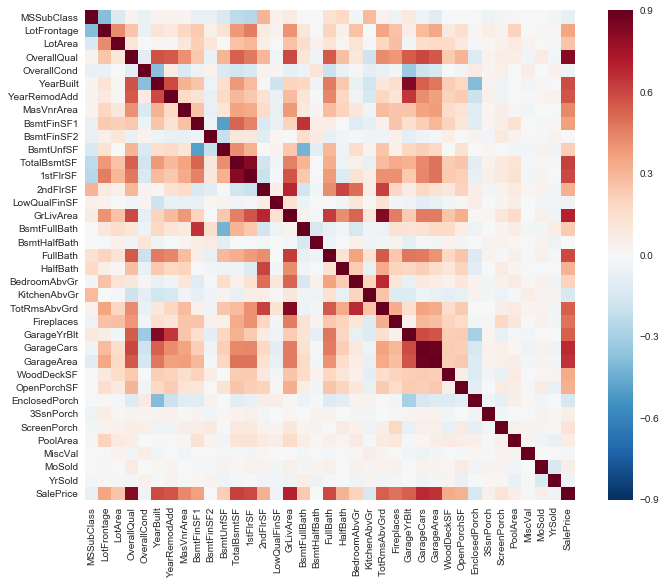

In [10]:
#correration matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
plt.show();

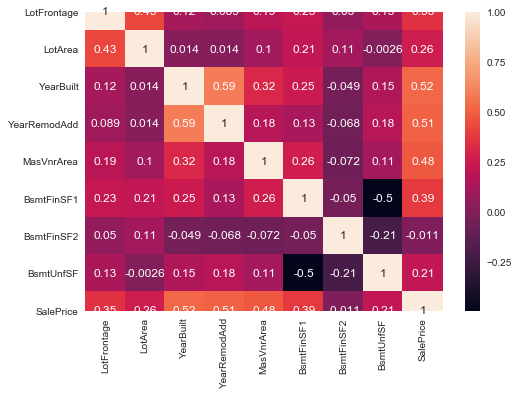

In [43]:
attributes = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'SalePrice']
sns.heatmap(train[attributes].corr(),annot=True)

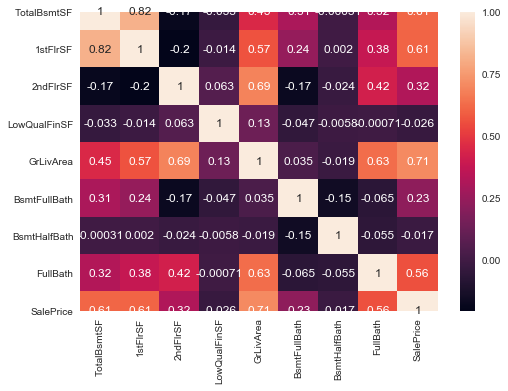

In [44]:
attributes = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
              'SalePrice']
sns.heatmap(train[attributes].corr(),annot=True)

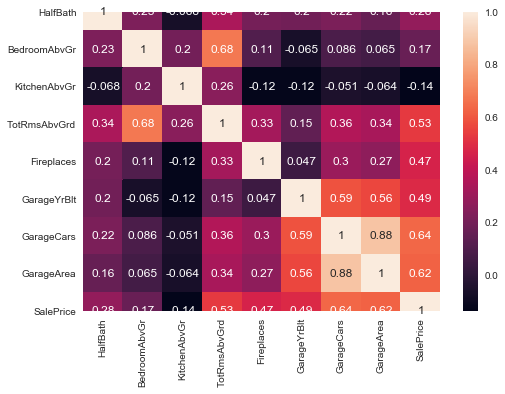

In [45]:
attributes = ['HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
              'SalePrice']
sns.heatmap(train[attributes].corr(),annot=True)

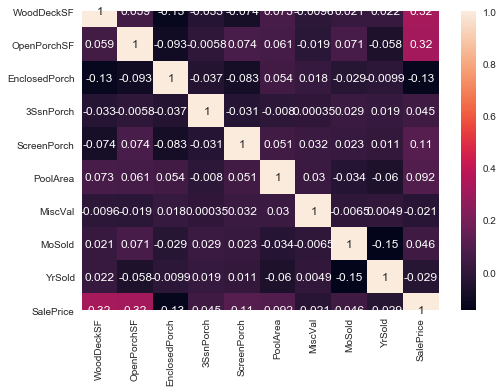

In [46]:
attributes = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold',
              'YrSold','SalePrice']
sns.heatmap(train[attributes].corr(),annot=True)

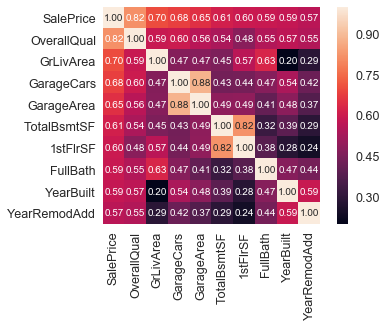

In [36]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

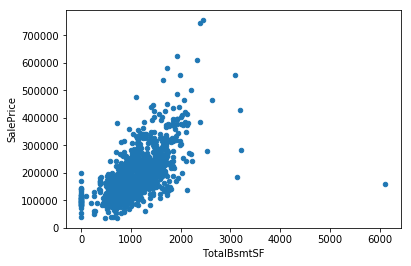

In [8]:
var ='TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim =0.800000);
plt.show()

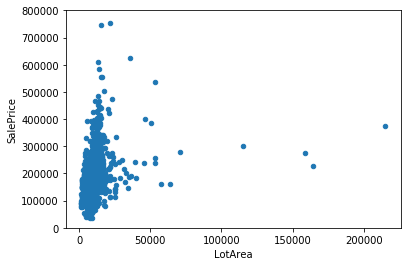

In [9]:
#scatter plot LotArea/salePrice
var = 'LotArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x= var, y='SalePrice', ylim =(0,800000));
plt.show();

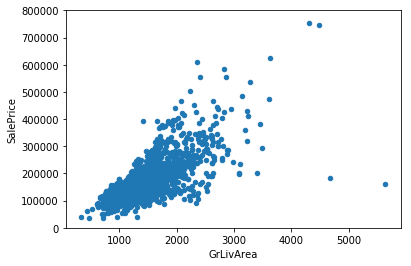

In [10]:
#scatter plot GrLivArea/salePrice
var ='GrLivArea'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));
plt.show()

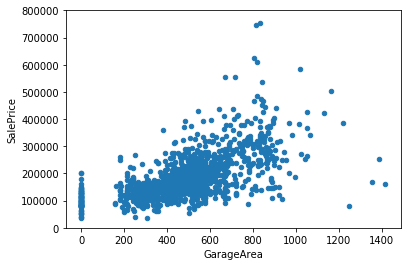

In [11]:
#scatter plot GarageArea/SalePrice
var = 'GarageArea'
data =pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var,y='SalePrice', ylim= (0,800000));
plt.show()

In [12]:
#Deleting Outliers of GrLivArea
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)


### Relation exploration for categorical features

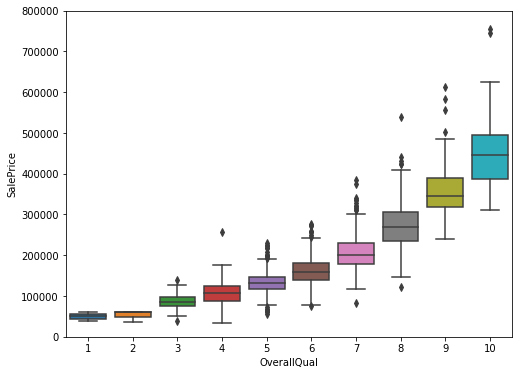

In [13]:
#box plot overallqual/salePrice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show();

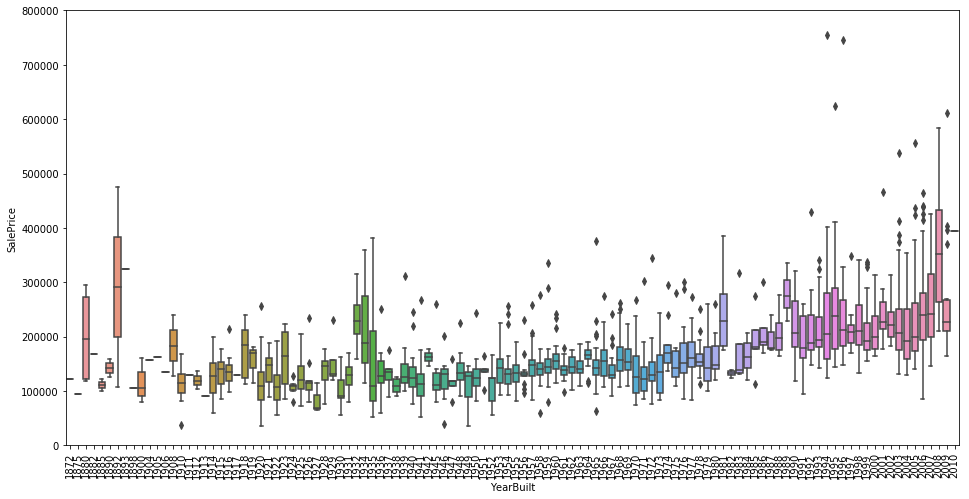

In [14]:
#year built
var  = 'YearBuilt'
data= pd.concat([train['SalePrice'], train[var]], axis =1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);
plt.show();

### Inputing Missing Values

In [18]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [19]:
all_data = pd.concat((train.loc[:, 'MSSubClass': 'SaleCondition'],
                     test.loc[:,'MSSubClass':'SaleCondition']))
print("all_data size is: {} ".format(all_data.shape))
all_data_na = (all_data.isnull().sum()/ len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
# [:30]
missing_data =pd.DataFrame({'Missing Raio':all_data_na})
missing_data.head(20)

all_data size is: (2917, 79) 


,Missing Raio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


### inputing missing values

###### Based on feature description provide, A feature that has NA means it is absent 

In [20]:
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

In [21]:
#Replacing missing value with 0(since no garage = no cars in such garage)
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#missing values are likely zero for no basement 
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#for below categorical basement-related feature NaN means that there is no basement 
for col in ('BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
#group by Neigborhood and fill missing value with median Lot frontage of all the neighboorhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
lambda x: x.fillna(x.median()))
    

##### Setting Mode values for missing entries

In [22]:
#msZoning classification: 'RL' is common
all_data ['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#functional: NA is typical
all_data["Functional"] = all_data["Functional"].fillna('Typ')

#Electrical
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#KitchenQual
all_data['KitchenQual'] =all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#Extrerior !st and Exterior 2nd
all_data ['Exterior1st']= all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd']= all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#sale type
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [23]:
#dropping as same value 'AllPub' for all records except 2NA and 1 'NoSeWa'
all_data = all_data.drop(['Utilities'], axis=1)

In [24]:
#Transforming required numerical features to categorical 
all_data['MSSubClass']= all_data['MSSubClass'].apply(str)
all_data['OverallCond'] =all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)


In [25]:
#Label Encoding some categorical variables
#for information in their ordering set

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
#shape
print('Shape all_data: {}'.format(all_data.shape))



Shape all_data: (2917, 78)


In [26]:
#add total surface area as TotalSf = basement + firstflr + secondflr
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [27]:
#log transform skewed numeric features 
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index

skewed_features = all_data[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
#compute skewness
print ("\skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness.head(7)                                              

                                 

\skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550


#### Box cox transformation of highly skewed features


In [28]:
skewness = skewness[abs(skewness) > 0.75]
print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to box cox transform


#### adding dummy categorical features


In [29]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [30]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train= train.SalePrice.values
train = pd.DataFrame(all_data[:ntrain])
test = pd.DataFrame(all_data[ntrain:])

#### Linear regression Modeling
I will be implementing
1. Lasso Regression
2. Gradient Boosting Regression 

In [31]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone



In [32]:
#validation function
n_folds = 5

def RMSLE_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error",
cv = kf))
    return(rmse)


In [33]:
#lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=4,
                                   random_state=5,max_features='sqrt')



###### scores from the above models


In [34]:
#Lasso
score = RMSLE_cv(lasso)
print ("\n Lasso score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

#Gradient Boosting Regression
score = RMSLE_cv(GBoost)
print ("\n GBoost score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


 Lasso score: 0.1115 (0.0074)


 GBoost score: 0.1167 (0.0084)




#### stacking the models 

###### averaging base model


In [35]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


    
# Averaged base models score

averaged_models = AveragingModels(models = (GBoost, lasso))

score = RMSLE_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1089 (0.0078)



In [36]:
#defining RMSLE evaluation function
def RMSLE (y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [37]:
#final training and prediction of the stacked regressor

averaged_models.fit(train.values, y_train) 
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print("RMSLE score on the train data:") 
print(RMSLE(y_train,stacked_train_pred))
print("Accuracy score:") 
averaged_models.score(train.values, y_train)

RMSLE score on the train data:
0.0697080501374
Accuracy score:


0.96956539495464311

In [39]:
ensemble = stacked_pred *1
submit = pd.DataFrame()
submit['id'] = test_ID
submit['SalePrice'] = ensemble
submit.to_csv('submission.csv', index = False)
submit.head()

,id,SalePrice
0,1461,121425.132538
1,1462,155609.339337
2,1463,191357.011599
3,1464,196858.153749
4,1465,189899.163028
